In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Load the dataset
df = pd.read_excel("laptop_battery_health_usage.xlsx")

# Display the first few rows and data types
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   デバイスID          50 non-null     object
 1   ブランド            50 non-null     object
 2   モデル年（発売年）       50 non-null     int64 
 3   os              50 non-null     object
 4   使用用途（利用タイプ）     50 non-null     object
 5   1日あたりの使用時間（時間）  50 non-null     int64 
 6   充電サイクル回数        50 non-null     int64 
 7   平均充電上限（%）       50 non-null     int64 
 8   バッテリー健康度（%）     50 non-null     int64 
 9   バッテリー経過月数（か月）   50 non-null     int64 
 10  過熱問題の有無         50 non-null     object
 11  性能評価（レーティング）    50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB
None
  デバイスID    ブランド  モデル年（発売年）       os  使用用途（利用タイプ）  1日あたりの使用時間（時間）  充電サイクル回数  \
0  LB001      HP       2021  Windows       Office               6       420   
1  LB002    Dell       2020  Windows  Programming               8   

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic' # For Windows
import pandas as pd

# Load the data
#df = pd.read_csv('laptop_battery_health_usage.xlsx - laptop_battery_health_usage.csv')
df = pd.read_excel("laptop_battery_health_usage.xlsx")
# Display basic info and first few rows
print("Data Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   デバイスID          50 non-null     object
 1   ブランド            50 non-null     object
 2   モデル年（発売年）       50 non-null     int64 
 3   os              50 non-null     object
 4   使用用途（利用タイプ）     50 non-null     object
 5   1日あたりの使用時間（時間）  50 non-null     int64 
 6   充電サイクル回数        50 non-null     int64 
 7   平均充電上限（%）       50 non-null     int64 
 8   バッテリー健康度（%）     50 non-null     int64 
 9   バッテリー経過月数（か月）   50 non-null     int64 
 10  過熱問題の有無         50 non-null     object
 11  性能評価（レーティング）    50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB
None

First 5 rows:
  デバイスID    ブランド  モデル年（発売年）       os  使用用途（利用タイプ）  1日あたりの使用時間（時間）  充電サイクル回数  \
0  LB001      HP       2021  Windows       Office               6       420   
1  LB002    Dell       2020  Windows  Prog

Descriptive Statistics:
         モデル年（発売年）  1日あたりの使用時間（時間）    充電サイクル回数   平均充電上限（%）  バッテリー健康度（%）  \
count    50.000000       50.000000   50.000000   50.000000     50.00000   
mean   2020.560000        6.600000  526.400000   92.100000     80.16000   
std       1.567007        1.498298  220.405563    6.857887     11.83278   
min    2018.000000        4.000000  180.000000   80.000000     55.00000   
25%    2019.250000        6.000000  342.500000   85.000000     72.50000   
50%    2021.000000        6.000000  495.000000   90.000000     82.50000   
75%    2022.000000        8.000000  695.000000  100.000000     90.00000   
max    2023.000000       10.000000  950.000000  100.000000     98.00000   

       バッテリー経過月数（か月）  性能評価（レーティング）  
count      50.000000     50.000000  
mean       42.240000      3.580000  
std        18.118161      1.144463  
min        12.000000      1.000000  
25%        25.500000      3.000000  
50%        38.000000      4.000000  
75%        58.500000      4.750000  
max 

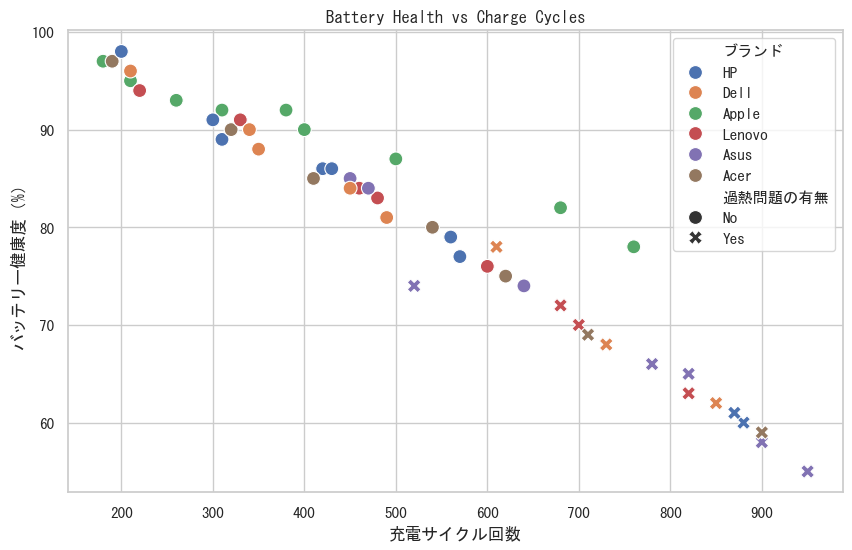

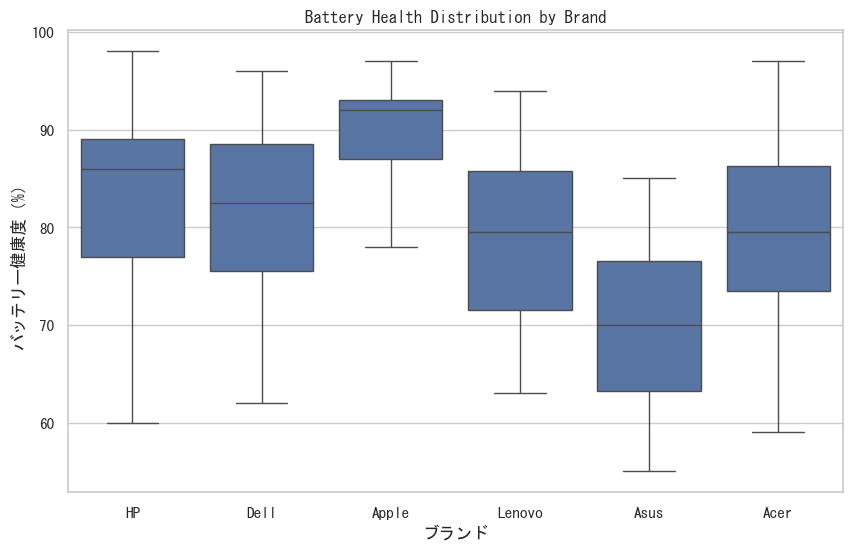

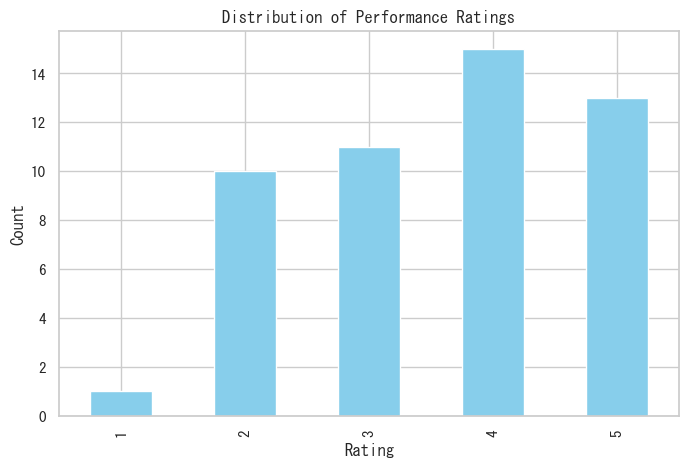

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")
# Handle Japanese characters in matplotlib
#plt.rcParams['font.family'] = 'sans-serif' # Defaulting to sans-serif as specific Japanese fonts might not be installed in the environment, but let's try to make it readable.

plt.rcParams['font.family'] = 'MS Gothic' # For Windows

# 1. Descriptive Statistics
stats = df.describe()

# 2. Correlation Matrix
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()

# 3. Aggregation by Brand
brand_analysis = df.groupby('ブランド')['バッテリー健康度（%）'].mean().sort_values(ascending=False)

# 4. Visualization: Battery Health vs Charge Cycles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='充電サイクル回数', y='バッテリー健康度（%）', hue='ブランド', style='過熱問題の有無', s=100)
plt.title('Battery Health vs Charge Cycles')
plt.savefig('health_vs_cycles.png')

# 5. Visualization: Battery Health by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ブランド', y='バッテリー健康度（%）')
plt.title('Battery Health Distribution by Brand')
plt.savefig('health_by_brand.png')

# 6. Visualization: Distribution of Rating
plt.figure(figsize=(8, 5))
df['性能評価（レーティング）'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Performance Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_dist.png')

# Output the stats for interpretation
print("Descriptive Statistics:")
print(stats)
print("\nMean Battery Health by Brand:")
print(brand_analysis)
print("\nCorrelation with Battery Health:")
print(correlation['バッテリー健康度（%）'].sort_values(ascending=False))